# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 12
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1


   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I flew from Cairo to Heathr...
1,"Not Verified | I flew with numerous airlines, ..."
2,✅ Trip Verified | We were traveling as a fami...
3,✅ Trip Verified | Flight at 8.40am from DUB to...
4,✅ Trip Verified | Terrible. I have traveled t...


In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.


## DATA MANIPULATION

In [6]:
# Importing and installing Libraries.
!pip install xlrd==1.2.0
!pip install openpyxl
import xlrd

'pip' is not recognized as an internal or external command,
operable program or batch file.


'pip' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
# Retrieving the csv Data. 
path_file = "D:\Employment\Forage Projects\British Airways\data\BA_reviews.csv"
BA_df = pd.read_csv(path_file)
BA_df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I flew from Cairo to Heathr...
1,1,"Not Verified | I flew with numerous airlines, ..."
2,2,✅ Trip Verified | We were traveling as a fami...
3,3,✅ Trip Verified | Flight at 8.40am from DUB to...
4,4,✅ Trip Verified | Terrible. I have traveled t...
...,...,...
1195,1195,"✅ Trip Verified | San Jose, CA to London Heath..."
1196,1196,✅ Trip Verified | Dubai to London. Cabin look...
1197,1197,✅ Trip Verified | London to Düsseldorf return...
1198,1198,✅ Trip Verified | New York to London. My flig...


* Removing Irrelevent Information 

In [8]:
# The information to delete. 
slice_1 = BA_df.iloc[0,1]
unknown = slice_1[0:19]
unknown


# Removing the information from the DataFrame.
BA_df['reviews'] = BA_df['reviews'].str.replace(unknown, " ")
BA_df['reviews'] = BA_df['reviews'].str.replace('|','')
BA_df['reviews'] = BA_df['reviews'].str.replace('Not Verified', " ")
BA_df['reviews']

C:\Users\User\AppData\Local\Temp\ipykernel_11404\1290091805.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  BA_df['reviews'] = BA_df['reviews'].str.replace(unknown, " ")
C:\Users\User\AppData\Local\Temp\ipykernel_11404\1290091805.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  BA_df['reviews'] = BA_df['reviews'].str.replace('|','')


0         I flew from Cairo to Heathrow on what they c...
1          I flew with numerous airlines, but I gotta ...
2         We were traveling as a family (5 people). Be...
3         Flight at 8.40am from DUB to LCY cancelled 1...
4         Terrible. I have traveled twice with them th...
                              ...                        
1195      San Jose, CA to London Heathrow round-trip i...
1196      Dubai to London. Cabin looked dire and wasn'...
1197      London to Düsseldorf return. Outbound flight...
1198      New York to London. My flight was cancelled ...
1199      Flew British Airways from Bangkok to Aberdee...
Name: reviews, Length: 1200, dtype: object

In [9]:
# Clean data.
BA_df['reviews']

0         I flew from Cairo to Heathrow on what they c...
1          I flew with numerous airlines, but I gotta ...
2         We were traveling as a family (5 people). Be...
3         Flight at 8.40am from DUB to LCY cancelled 1...
4         Terrible. I have traveled twice with them th...
                              ...                        
1195      San Jose, CA to London Heathrow round-trip i...
1196      Dubai to London. Cabin looked dire and wasn'...
1197      London to Düsseldorf return. Outbound flight...
1198      New York to London. My flight was cancelled ...
1199      Flew British Airways from Bangkok to Aberdee...
Name: reviews, Length: 1200, dtype: object

## Data Analysis

In [10]:
# Importing required Libraries.
import re
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# Creating a review Analitic Variable.
sia = SentimentIntensityAnalyzer()

In [12]:
# The sia analyzer will tell you the positivity,negativity, neutrality and composition of the of the review.
# from the analyzer we can pridict weather the response is positive or negative and also tell weather the service is recommended or not. 
# Creating a Column DataFrame Index.  
Review_measure = {'Reviews':[], 'neg':[],'neu':[], 'pos':[], 'comp':[], 'Resp_Output':[], 'Recomendation': []}

In [13]:
# Creating a DataFrame required for analysis.
t = 0
while t < len(BA_df):
    measure = sia.polarity_scores(BA_df.iloc[t,1]) # Measuring the negativit, positivity, neutrality and composition.
    Review_measure['Reviews'] = Review_measure['Reviews'] + [BA_df.iloc[t,1]]  # Storing a review into the new DataFrame
    Review_measure['neg'] = Review_measure['neg'] + [measure['neg']] # Storing the negative Attribute values.
    Review_measure['neu'] = Review_measure['neu'] + [measure['neu']] # Storing the neutral attribute values.
    Review_measure['pos'] = Review_measure['pos'] + [measure['pos']] # storing the positive attribute values.
    Review_measure['comp'] = Review_measure['comp'] + [measure['compound']] # storing the composite attribute values.
    
    if measure['compound'] > 0:
        Response = 'Positive'
        Review_measure['Resp_Output'] = Review_measure['Resp_Output']+[Response]
        
        if measure['compound'] > 0.9:
            Reco = 'Recommended'
            Review_measure['Recomendation'] = Review_measure['Recomendation']+[Reco]
        else:
            Reco = 'Not Recommended'
            Review_measure['Recomendation'] = Review_measure['Recomendation']+[Reco]
        
    else:
        Response = 'Negatige'
        Review_measure['Resp_Output'] = Review_measure['Resp_Output']+[Response]
        
        if measure['compound'] > 0.9:
            Reco = 'Recommended'
            Review_measure['Recomendation'] = Review_measure['Recomendation']+[Reco]
        else:
            Reco = 'Not Recommended'
            Review_measure['Recomendation'] = Review_measure['Recomendation']+[Reco]

    t = t+1
    


In [14]:
# Craeting pandas final DataFrame for analysis.
nw_df = pd.DataFrame(Review_measure)
nw_df.head()

,Reviews,neg,neu,pos,comp,Resp_Output,Recomendation
0,I flew from Cairo to Heathrow on what they c...,0.110,0.863,0.027,-0.7644,Negatige,Not Recommended
1,"I flew with numerous airlines, but I gotta ...",0.056,0.810,0.134,0.7096,Positive,Not Recommended
2,We were traveling as a family (5 people). Be...,0.082,0.832,0.086,0.1189,Positive,Not Recommended
3,Flight at 8.40am from DUB to LCY cancelled 1...,0.161,0.727,0.112,-0.9617,Negatige,Not Recommended
4,Terrible. I have traveled twice with them th...,0.292,0.672,0.036,-0.9493,Negatige,Not Recommended


## Exploratory Data Analysis.|

In [15]:
Explore_Data = nw_df[nw_df['Recomendation']== 'Not Recommended']
print(Explore_Data.head(10))
print('In all the above 10 reviews, all of them have some negativity about the Airline. Hence, lead the customer not to recommend the Airline')

                                             Reviews    neg    neu    pos  \
0    I flew from Cairo to Heathrow on what they c...  0.110  0.863  0.027   
1     I flew with numerous airlines, but I gotta ...  0.056  0.810  0.134   
2    We were traveling as a family (5 people). Be...  0.082  0.832  0.086   
3    Flight at 8.40am from DUB to LCY cancelled 1...  0.161  0.727  0.112   
4    Terrible. I have traveled twice with them th...  0.292  0.672  0.036   
5    The customer service is ugly. Tried calling ...  0.125  0.875  0.000   
6    Most uncomfortable flight I have ever experi...  0.101  0.832  0.067   
7    I booked our first out of country trip to ta...  0.053  0.904  0.044   
8    My husband and I booked seats within our pre...  0.100  0.900  0.000   
9     May 3, flew from Seattle to Heathrow then t...  0.041  0.924  0.034   

     comp Resp_Output    Recomendation  
0 -0.7644    Negatige  Not Recommended  
1  0.7096    Positive  Not Recommended  
2  0.1189    Positive  Not Re

## Data Visualization. 

In [16]:
# Selecting the require data.
df = nw_df[nw_df['comp']<0.9] # Selecting all the negative and Non Recommends for visaulization.
df

,Reviews,neg,neu,pos,comp,Resp_Output,Recomendation
0,I flew from Cairo to Heathrow on what they c...,0.110,0.863,0.027,-0.7644,Negatige,Not Recommended
1,"I flew with numerous airlines, but I gotta ...",0.056,0.810,0.134,0.7096,Positive,Not Recommended
2,We were traveling as a family (5 people). Be...,0.082,0.832,0.086,0.1189,Positive,Not Recommended
3,Flight at 8.40am from DUB to LCY cancelled 1...,0.161,0.727,0.112,-0.9617,Negatige,Not Recommended
4,Terrible. I have traveled twice with them th...,0.292,0.672,0.036,-0.9493,Negatige,Not Recommended
...,...,...,...,...,...,...,...
1192,"Johannesburg to London. Awful, pathetic serv...",0.084,0.795,0.122,0.8600,Positive,Not Recommended
1196,Dubai to London. Cabin looked dire and wasn'...,0.222,0.778,0.000,-0.9637,Negatige,Not Recommended
1197,London to Düsseldorf return. Outbound flight...,0.102,0.845,0.053,-0.7397,Negatige,Not Recommended
1198,New York to London. My flight was cancelled ...,0.119,0.840,0.041,-0.9659,Negatige,Not Recommended


In [17]:
# Count of Negative and positive Reviews.
Rep_count = nw_df.groupby('Resp_Output').count()
Rep_count

,Reviews,neg,neu,pos,comp,Recomendation
Resp_Output,,,,,,
Negatige,577,577,577,577,577,577
Positive,623,623,623,623,623,623


In [18]:
# Count of recommended and Non recomended from reviews.  
Reco_Count = nw_df.groupby('Recomendation').count()
Reco_Count

,Reviews,neg,neu,pos,comp,Resp_Output
Recomendation,,,,,,
Not Recommended,876,876,876,876,876,876
Recommended,324,324,324,324,324,324


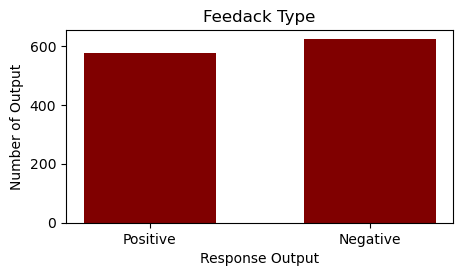

In [19]:
# Plot of Negative and Positive reviews.
fig = plt.figure(figsize = (5, 2.5))
Head = ['Positive', 'Negative']
plt.bar(Head, Rep_count['Reviews'], color ='maroon',
        width = 0.6)
 
plt.xlabel("Response Output")
plt.ylabel("Number of Output")
plt.title("Feedack Type")
plt.show()

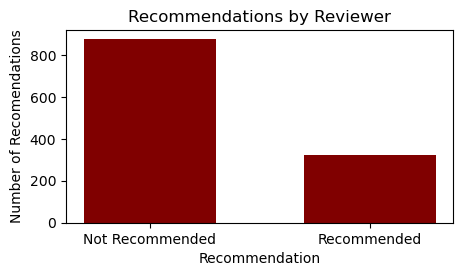

In [20]:
# Plot of Non Recommended and Recommended from Reviews.
fig = plt.figure(figsize = (5, 2.5))
Head = ['Not Recommended', 'Recommended']

plt.bar(Head, Reco_Count['Reviews'], color ='maroon',
        width = 0.6)
 
plt.xlabel("Recommendation")
plt.ylabel("Number of Recomendations")
plt.title("Recommendations by Reviewer")
plt.show()

In [21]:
# Installing the required libraries for Wordcloud visualization.
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
# Selecting Data set of Non recommended reviews for creating the word_cloud. 
words_2_cloud = nw_df[nw_df['Recomendation']=='Not Recommended']
words_2_cloud

,Reviews,neg,neu,pos,comp,Resp_Output,Recomendation
0,I flew from Cairo to Heathrow on what they c...,0.110,0.863,0.027,-0.7644,Negatige,Not Recommended
1,"I flew with numerous airlines, but I gotta ...",0.056,0.810,0.134,0.7096,Positive,Not Recommended
2,We were traveling as a family (5 people). Be...,0.082,0.832,0.086,0.1189,Positive,Not Recommended
3,Flight at 8.40am from DUB to LCY cancelled 1...,0.161,0.727,0.112,-0.9617,Negatige,Not Recommended
4,Terrible. I have traveled twice with them th...,0.292,0.672,0.036,-0.9493,Negatige,Not Recommended
...,...,...,...,...,...,...,...
1192,"Johannesburg to London. Awful, pathetic serv...",0.084,0.795,0.122,0.8600,Positive,Not Recommended
1196,Dubai to London. Cabin looked dire and wasn'...,0.222,0.778,0.000,-0.9637,Negatige,Not Recommended
1197,London to Düsseldorf return. Outbound flight...,0.102,0.845,0.053,-0.7397,Negatige,Not Recommended
1198,New York to London. My flight was cancelled ...,0.119,0.840,0.041,-0.9659,Negatige,Not Recommended


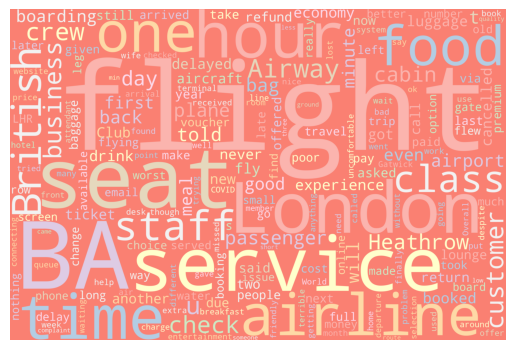

In [23]:
# Creating the Word_Cloud. 
text = " ".join(cat for cat in words_2_cloud.Reviews)
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text)

plt.imshow(word_cloud)
plt.axis("off")
plt.show()

## <p style="text-align: center;"><u>THE END of Task One </p>

## Author

<a href="https://www.linkedin.com/in/percy-mmutle-831a63223/">Percy Itumeleng Mmutle</a> Did Bsc In Nuclear Science and Engineering, My focus is on collecting, analysing and building models to help with efficint use of data, to help with business development and creation of a better models that works with data. I have been working on building a system that will transform the way information is accessed and health deviation is monitored, my current focus is on developing robust skills of working with data and its tools.